# Using Data to Predict the Results of 2022 World Cup
#### Emma Williamson
*** 
## Introduction
### Motivation
For the past three weeks, the entire world has come together to watch 2022 World Cup and support their team. This a soccer/football tournament that occurs every four years and unites the countries of the world, as they play against eachother in one of the biggest sporting events to become the world champion. This project will focus on each countries game statistics in the games they have played in order to predict the outcome of tournament and the success of select teams.

This tutorial will teach you how to:
- Collect data from sources
- Clean and reorganize data
- Find statistics for data
- Graph and model relationships between data
- Classification model????!!!!!

#### Background
This source linked below is helpful for understanding the logistics of the 2022 World Cup. It specifically breaks down the organization of each stage in the tournament, how points are awarded, how ties are determined, how teams advance and more.  

[Answering Your Questions About the 2022 World Cup](https://www.nytimes.com/article/world-cup-qatar-faq.html)  
[FIFA World Cup](https://en.wikipedia.org/wiki/FIFA_World_Cup#:~:text=The%20final%20tournament%20format%20since,groups%20of%20four%20teams%20each.)  

Brief Summary
- Group Stage: 
    - 32 teams divided into 8 groups of 4
    - Points awarded to teams based on game outcome: 3 points for a win, 1 point for a draw, 0 for a loss
    - Top two finishers in each group go to the round of 16
    - Tied points in the end will be determined based on goals scored
- Knockout Stage:
    - 16 teams
    - Single-elimination
    - Ties determined by extra time and penalty shootouts
- Quarter-Finals
- Semi-Finals
- Third Place Match
- Final
  
### Required Libraries/Tools
The following libraries will be used throughout the tutorial and will need to be imported in order to not cause any errors.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy.stats

## Part 1: Data Collection
In this project we are getting our data from two different CSV files,  
[Team Data](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=team_data.csv) - This data analyzes each team and many very specific game statistics over all of the games they have played in the 2022 World Cup  
[Group Stats](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=group_stats.csv) - This data includes more general information of each teams game statistics based off of the results of the group stages in the 2022 World Cup  
[Column Descriptions](https://www.kaggle.com/datasets/8bb0ea3d654f93b25524e44a65c39322f09e6aef70ea4e961838b9cd2d83fe86?resource=download&select=team_tips.json) - This is the link to the column descriptions  
We first read in both CSV file and then display the head of each dataframe in order to visualize the data and assure it is formatted properly.

In [2]:
team_data = pd.read_csv("team_data.csv")
group_stats = pd.read_csv("group_stats.csv")

In [3]:
team_data.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,21,28.5,61.6,5,55,480,5.3,9,6,...,59,89,18,3,0,1,226,68,61,52.7
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.4,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [4]:
group_stats.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,3,1,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,4,2,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97


### Explanation of Data

## Part 2: Data Processing
### Tidying the Data

In [5]:
#The team_data is completely up to date, so some of the data would be skewed because some teams have played more games than the others, I will now clean up that data by eliminating columns that are unnecessary for this project, and manipulating left over data so it is an average over the number of games, so that it is fair and accurately depicts the data
new_team_data = team_data[['team', 'games', 'goals_per90', 'gk_save_pct', 'gk_goals_against_per90', 'gk_shots_on_target_against', 'shots_per90', 'shots_on_target_per90', 'corner_kicks', 'blocked_shots', 'fouls', 'fouled']]
#for the columns left that could be skewed due to the number of games the team had played, I will divide that number by the number of games to get the average statistic per game, this only applies to some columns because some are already per 90 mins or a percentage
new_team_data.head()

,team,games,goals_per90,gk_save_pct,gk_goals_against_per90,gk_shots_on_target_against,shots_per90,shots_on_target_per90,corner_kicks,blocked_shots,fouls,fouled
0,Argentina,5,1.69,16.7,0.94,6,12.75,4.87,31,9,59,89
1,Australia,4,0.75,66.7,1.50,18,6.50,2.00,8,20,52,34
2,Belgium,3,0.33,81.8,0.67,11,11.67,3.00,17,8,30,35
3,Brazil,5,1.50,70.0,0.56,10,17.81,7.50,37,10,63,74
4,Cameroon,3,1.33,73.3,1.38,15,9.33,5.33,12,6,32,38


In [6]:
gk_shots_on_target_against_per90 = []
corner_kicks_per90 = []
blocked_shots_per90 =[]
fouls_per90 = []
fouled_per90 = []


for i, row in new_team_data.iterrows():
    gk_shots_on_target_against_per90.append(row['gk_shots_on_target_against']/row['games'])
    corner_kicks_per90.append(row['corner_kicks']/row['games'])
    blocked_shots_per90.append(row['blocked_shots']/row['games'])
    fouls_per90.append(row['fouls']/row['games'])
    fouled_per90.append(row['fouled']/row['games'])

new_team_data['gk_shots_on_target_against_per90'] = gk_shots_on_target_against_per90
new_team_data['corner_kicks_per90'] = corner_kicks_per90
new_team_data['blocked_shots_per90'] = blocked_shots_per90
new_team_data['fouls_per90'] = fouls_per90
new_team_data['fouled_per90'] = fouled_per90

new_new_team_data = new_team_data[new_team_data.columns[~new_team_data.columns.isin(['games', 'gk_shots_on_target_against', 'corner_kicks', 'blocked_shots', 'fouls', 'fouled'])]]
new_new_team_data.head()

/tmp/ipykernel_898/491987163.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_team_data['gk_shots_on_target_against_per90'] = gk_shots_on_target_against_per90
/tmp/ipykernel_898/491987163.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_team_data['corner_kicks_per90'] = corner_kicks_per90
/tmp/ipykernel_898/491987163.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,team,goals_per90,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90
0,Argentina,1.69,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000
1,Australia,0.75,66.7,1.50,6.50,2.00,4.500000,2.000000,5.000000,13.000000,8.500000
2,Belgium,0.33,81.8,0.67,11.67,3.00,3.666667,5.666667,2.666667,10.000000,11.666667
3,Brazil,1.50,70.0,0.56,17.81,7.50,2.000000,7.400000,2.000000,12.600000,14.800000
4,Cameroon,1.33,73.3,1.38,9.33,5.33,5.000000,4.000000,2.000000,10.666667,12.666667


### Combining Data Tables

In [7]:
# on the left over teams, merges with the team_data so we have all data in one table
#see if i can figure out how to make IR Iran in group stats become Iran so merge works without removing it
group_stats['team'] = group_stats['team'].replace(to_replace="IR Iran", value="Iran")
merged_data = group_stats.merge(new_new_team_data, how='inner', on=['team'])
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,goals_per90,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90
0,0,1,1,Netherlands,3,2,1,0,5,1,...,1.87,86.4,0.75,7.88,3.00,4.400000,3.800000,3.600000,17.400000,10.000000
1,1,1,2,Senegal,3,2,0,1,5,4,...,1.25,50.0,1.75,12.75,3.00,3.500000,5.250000,1.500000,12.000000,14.250000
2,2,1,3,Ecuador,3,1,1,1,4,3,...,1.33,50.0,1.00,9.67,3.33,1.333333,3.666667,1.333333,16.666667,12.333333
3,3,1,4,Qatar,3,0,0,3,1,7,...,0.33,50.0,2.33,6.67,2.00,4.000000,3.000000,1.333333,10.333333,15.000000
4,4,2,1,England,3,2,1,0,9,2,...,2.60,72.7,0.80,12.20,5.40,2.200000,5.000000,2.600000,10.600000,13.000000
5,5,2,2,United States,3,1,2,0,2,1,...,0.75,75.0,1.00,11.25,3.25,3.000000,5.500000,1.000000,11.250000,10.000000
6,6,2,3,Iran,3,1,0,2,4,7,...,1.33,53.3,2.33,10.67,2.67,5.000000,2.666667,2.666667,12.666667,8.666667
7,7,2,4,Wales,3,0,1,2,1,6,...,0.33,57.1,2.01,7.67,2.00,4.666667,2.000000,5.000000,11.666667,11.000000
8,8,3,1,Argentina,3,2,0,1,5,2,...,1.69,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000
9,9,3,2,Poland,3,1,1,1,2,2,...,0.75,82.1,1.25,7.25,1.25,7.000000,2.750000,3.250000,11.750000,11.750000


## Part 3: Exploratory Analysis & Data Visualization

Slope is:  0.07296437234057557
R-value is:  0.3949490538113235


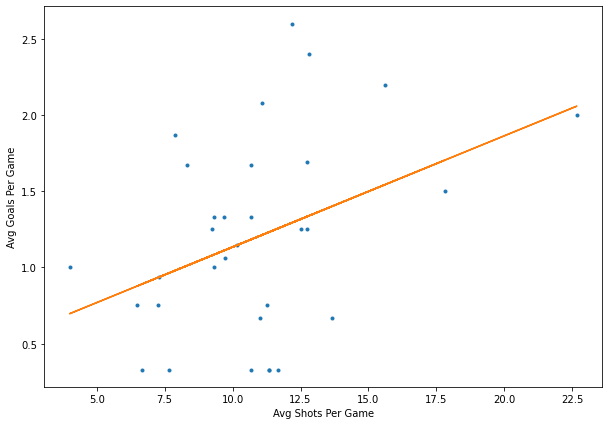

In [8]:
x = np.array(merged_data['shots_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Shots Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.250185510471671
R-value is:  0.5988560797363265


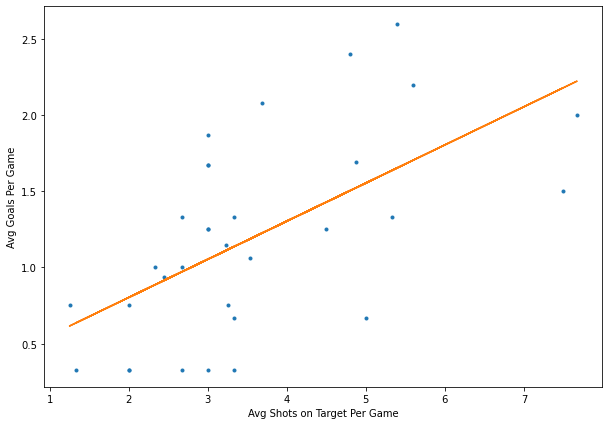

In [9]:
x = np.array(merged_data['shots_on_target_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Shots on Target Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m) 
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.09348800351772392
R-value is:  0.27194615594598665


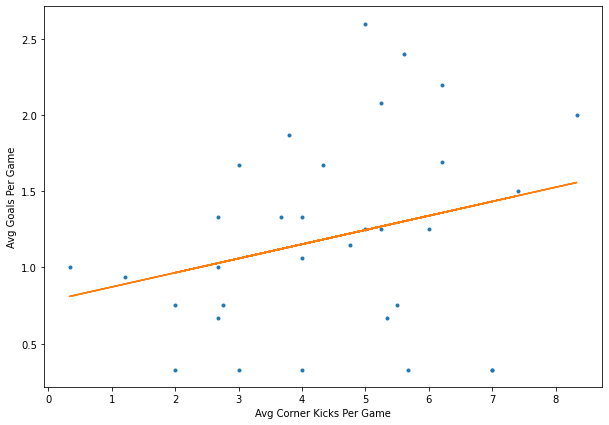

In [10]:
x = np.array(merged_data['corner_kicks_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Corner Kicks Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.022949656160897957
R-value is:  0.08344618347975097


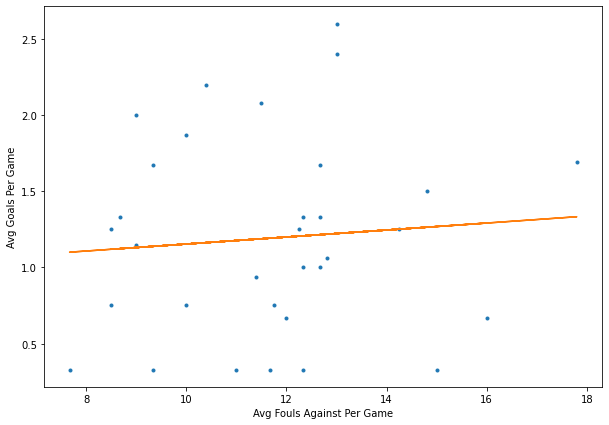

In [11]:
x = np.array(merged_data['fouled_per90'])
y = np.array(merged_data['goals_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Fouls Against Per Game")
plt.ylabel("Avg Goals Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.32953736984645715
R-value is:  0.7188523992365627


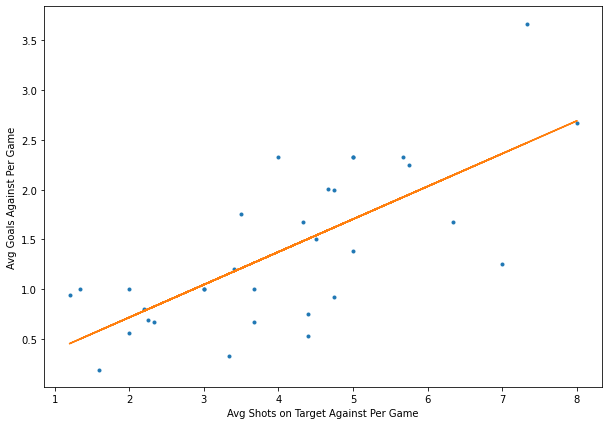

In [12]:
x = np.array(merged_data['gk_shots_on_target_against_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Shots on Target Against Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  0.0991945734675361
R-value is:  0.1686504490714393


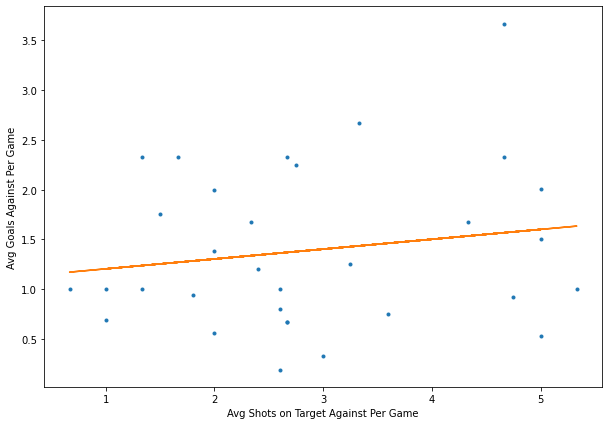

In [13]:
x = np.array(merged_data['blocked_shots_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Shots on Target Against Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

Slope is:  -0.050613703787157245
R-value is:  -0.1707868515295538


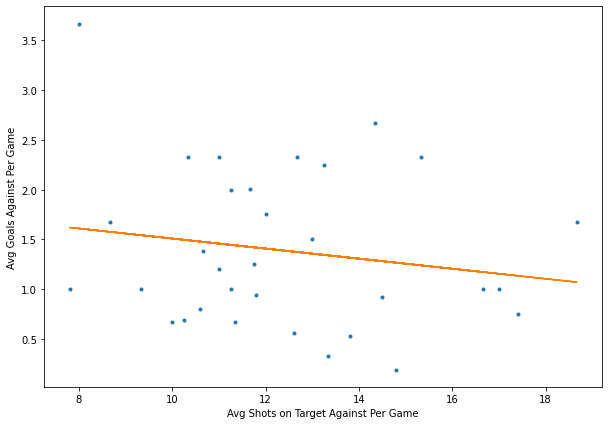

In [14]:
x = np.array(merged_data['fouls_per90'])
y = np.array(merged_data['gk_goals_against_per90'])
plt.figure(figsize=(10,7))
plt.plot(x, y, '.')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.xlabel("Avg Shots on Target Against Per Game")
plt.ylabel("Avg Goals Against Per Game")
print("Slope is: ",m)
r = np.corrcoef(x, y)
print("R-value is: ", r[0,1])

In [15]:
goals_scored_pct = []

for i, row in team_data.iterrows(): 
    goals_scored_pct.append((row['shots_on_target'] - row['goals']) / (row['shots_on_target']))
merged_data['goals_scored_pct'] = goals_scored_pct
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90,goals_scored_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,86.4,0.75,7.88,3.00,4.400000,3.800000,3.600000,17.400000,10.000000,0.653846
1,1,1,2,Senegal,3,2,0,1,5,4,...,50.0,1.75,12.75,3.00,3.500000,5.250000,1.500000,12.000000,14.250000,0.625000
2,2,1,3,Ecuador,3,1,1,1,4,3,...,50.0,1.00,9.67,3.33,1.333333,3.666667,1.333333,16.666667,12.333333,0.888889
3,3,1,4,Qatar,3,0,0,3,1,7,...,50.0,2.33,6.67,2.00,4.000000,3.000000,1.333333,10.333333,15.000000,0.800000
4,4,2,1,England,3,2,1,0,9,2,...,72.7,0.80,12.20,5.40,2.200000,5.000000,2.600000,10.600000,13.000000,0.750000
5,5,2,2,United States,3,1,2,0,2,1,...,75.0,1.00,11.25,3.25,3.000000,5.500000,1.000000,11.250000,10.000000,0.750000
6,6,2,3,Iran,3,1,0,2,4,7,...,53.3,2.33,10.67,2.67,5.000000,2.666667,2.666667,12.666667,8.666667,0.571429
7,7,2,4,Wales,3,0,1,2,1,6,...,57.1,2.01,7.67,2.00,4.666667,2.000000,5.000000,11.666667,11.000000,0.700000
8,8,3,1,Argentina,3,2,0,1,5,2,...,16.7,0.94,12.75,4.87,1.200000,6.200000,1.800000,11.800000,17.800000,0.900000
9,9,3,2,Poland,3,1,1,1,2,2,...,82.1,1.25,7.25,1.25,7.000000,2.750000,3.250000,11.750000,11.750000,0.600000


The Average Goal Scoring Percentage among the teams eliminated:  0.6457325371387872
The Average Goal Scoring Percentage among the teams not yet eliminated:  0.6639574043106653


Text(0, 0.5, 'Goals Scoring Percentage')

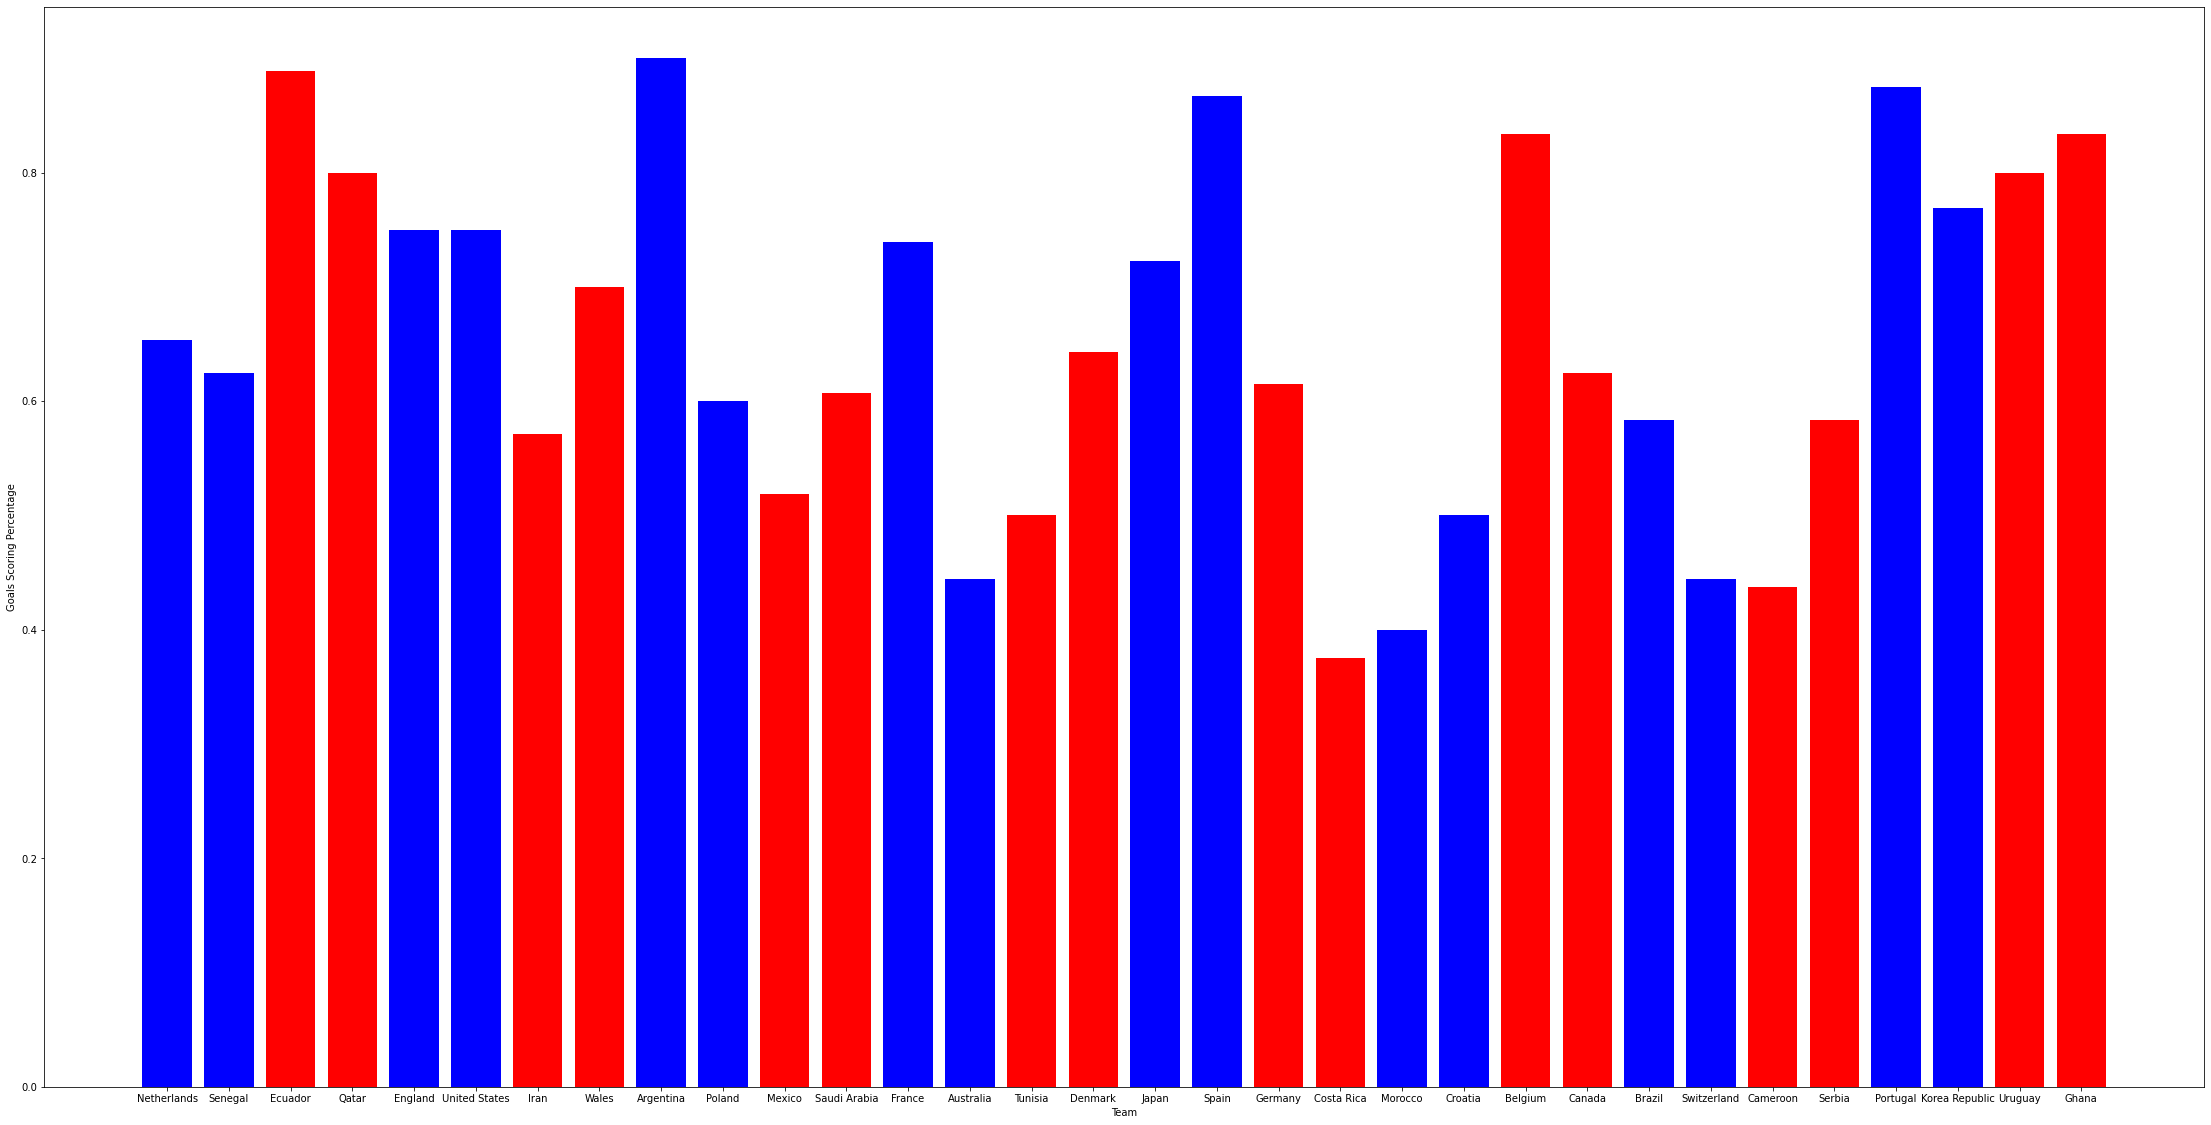

In [16]:
x = np.array(merged_data['team'])
y = np.array(merged_data['goals_scored_pct'])

eliminated_avg = 0
not_eliminated_avg = 0

colors = []
for i, row in merged_data.iterrows(): # keys are the names of the boys
    if row['rank'] == 3:
        colors.append('r')
        eliminated_avg += row['goals_scored_pct']
    elif row['rank'] == 4:
        colors.append('r')
        eliminated_avg += row['goals_scored_pct']
    else:
        colors.append('b')
        not_eliminated_avg += row['goals_scored_pct']
        
eliminated_avg = eliminated_avg/16
not_eliminated_avg = not_eliminated_avg/16

print("The Average Goal Scoring Percentage among the teams eliminated: ", eliminated_avg)
print("The Average Goal Scoring Percentage among the teams not yet eliminated: ", not_eliminated_avg)

fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, color=colors)
plt.xlabel("Team")
plt.ylabel("Goals Scoring Percentage")

The Average Goal Keeper Save Percentage among the teams eliminated:  65.21875
The Average Goal Keeper Save Percentage among the teams not yet eliminated:  69.575


Text(0, 0.5, 'Goal Keeper Save Percentage')

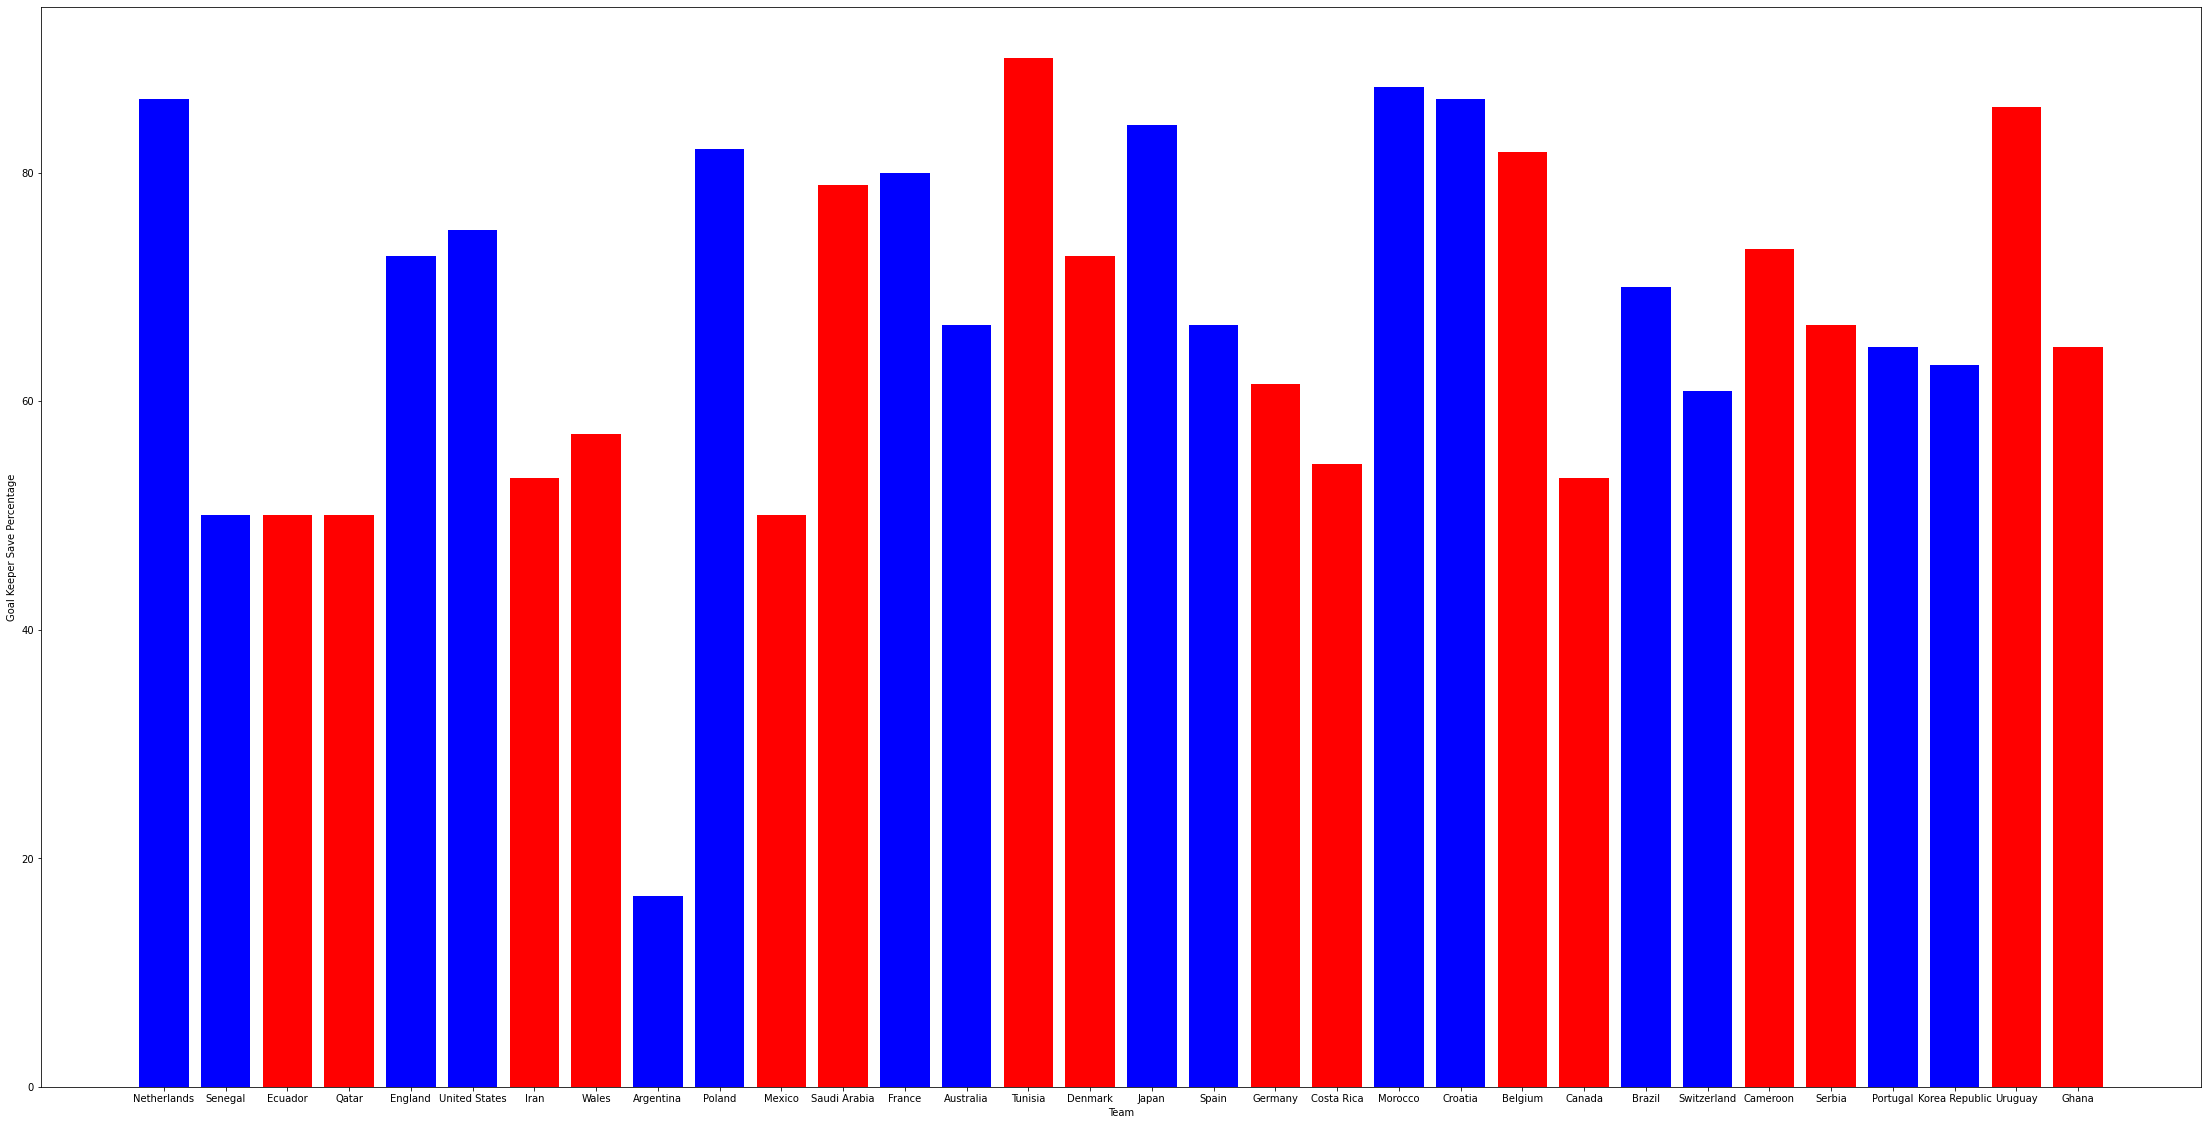

In [17]:
x = np.array(merged_data['team'])
y = np.array(merged_data['gk_save_pct'])

eliminated_avg = 0
not_eliminated_avg = 0

colors = []
for i, row in merged_data.iterrows(): # keys are the names of the boys
    if row['rank'] == 3:
        colors.append('r')
        eliminated_avg += row['gk_save_pct']
    elif row['rank'] == 4:
        colors.append('r')
        eliminated_avg += row['gk_save_pct']
    else:
        colors.append('b')
        not_eliminated_avg += row['gk_save_pct']
        
eliminated_avg = eliminated_avg/16
not_eliminated_avg = not_eliminated_avg/16

print("The Average Goal Keeper Save Percentage among the teams eliminated: ", eliminated_avg)
print("The Average Goal Keeper Save Percentage among the teams not yet eliminated: ", not_eliminated_avg)

fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, color=colors)
plt.xlabel("Team")
plt.ylabel("Goal Keeper Save Percentage")

In [18]:
#In both scenarios the teams that have not yet been eliminated have a higher accuracy percentage

In [19]:
#Now we eliminate the eliminated teams
#I am beginning this project at the end of the group stages, at this point half of the teams included in the data have been eliminated from the world cup, so I am going to clean up the data by removing the teams eliminated from the world cup at this point in time.
#There are 32 teams total, organized in 8 groups of 4, the two teams with the least amount of points in the group is eliminated
#The way the data is organized, the first two teams have the greatest amount of points and have advanced to the round of 16, so the last two teams listed in each group at rank 3 and 4 must be eliminated
for x in range(1,9):
    for index, team in merged_data[merged_data['group'] == x].iterrows():
        merged_data.drop(merged_data[ (merged_data['rank'] == 3) | (merged_data['rank'] == 4)].index, inplace=True)       
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,gk_save_pct,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90,goals_scored_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,86.4,0.75,7.88,3.00,4.40,3.80,3.60,17.40,10.00,0.653846
1,1,1,2,Senegal,3,2,0,1,5,4,...,50.0,1.75,12.75,3.00,3.50,5.25,1.50,12.00,14.25,0.625000
4,4,2,1,England,3,2,1,0,9,2,...,72.7,0.80,12.20,5.40,2.20,5.00,2.60,10.60,13.00,0.750000
5,5,2,2,United States,3,1,2,0,2,1,...,75.0,1.00,11.25,3.25,3.00,5.50,1.00,11.25,10.00,0.750000
8,8,3,1,Argentina,3,2,0,1,5,2,...,16.7,0.94,12.75,4.87,1.20,6.20,1.80,11.80,17.80,0.900000
9,9,3,2,Poland,3,1,1,1,2,2,...,82.1,1.25,7.25,1.25,7.00,2.75,3.25,11.75,11.75,0.600000
12,12,4,1,France,3,2,0,1,6,3,...,80.0,1.00,15.60,5.60,3.00,6.20,2.60,7.80,10.40,0.739130
13,13,4,2,Australia,3,2,0,1,3,4,...,66.7,1.50,6.50,2.00,4.50,2.00,5.00,13.00,8.50,0.444444
16,16,5,1,Japan,3,2,0,1,4,3,...,84.2,0.92,10.15,3.23,4.75,4.75,4.75,14.50,9.00,0.722222
17,17,5,2,Spain,3,1,1,1,9,3,...,66.7,0.69,11.08,3.69,2.25,5.25,1.00,10.25,11.50,0.866667


In [20]:
performance_accuracy_pct = []
for i, row in merged_data.iterrows():
    performance_accuracy_pct.append((row['goals_scored_pct'] + row['gk_save_pct']) / 2)
merged_data['performance_accuracy_pct'] = performance_accuracy_pct
merged_data

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,...,gk_goals_against_per90,shots_per90,shots_on_target_per90,gk_shots_on_target_against_per90,corner_kicks_per90,blocked_shots_per90,fouls_per90,fouled_per90,goals_scored_pct,performance_accuracy_pct
0,0,1,1,Netherlands,3,2,1,0,5,1,...,0.75,7.88,3.00,4.40,3.80,3.60,17.40,10.00,0.653846,43.526923
1,1,1,2,Senegal,3,2,0,1,5,4,...,1.75,12.75,3.00,3.50,5.25,1.50,12.00,14.25,0.625000,25.312500
4,4,2,1,England,3,2,1,0,9,2,...,0.80,12.20,5.40,2.20,5.00,2.60,10.60,13.00,0.750000,36.725000
5,5,2,2,United States,3,1,2,0,2,1,...,1.00,11.25,3.25,3.00,5.50,1.00,11.25,10.00,0.750000,37.875000
8,8,3,1,Argentina,3,2,0,1,5,2,...,0.94,12.75,4.87,1.20,6.20,1.80,11.80,17.80,0.900000,8.800000
9,9,3,2,Poland,3,1,1,1,2,2,...,1.25,7.25,1.25,7.00,2.75,3.25,11.75,11.75,0.600000,41.350000
12,12,4,1,France,3,2,0,1,6,3,...,1.00,15.60,5.60,3.00,6.20,2.60,7.80,10.40,0.739130,40.369565
13,13,4,2,Australia,3,2,0,1,3,4,...,1.50,6.50,2.00,4.50,2.00,5.00,13.00,8.50,0.444444,33.572222
16,16,5,1,Japan,3,2,0,1,4,3,...,0.92,10.15,3.23,4.75,4.75,4.75,14.50,9.00,0.722222,42.461111
17,17,5,2,Spain,3,1,1,1,9,3,...,0.69,11.08,3.69,2.25,5.25,1.00,10.25,11.50,0.866667,33.783333


Text(0, 0.5, 'Performance Accuracy Percentage')

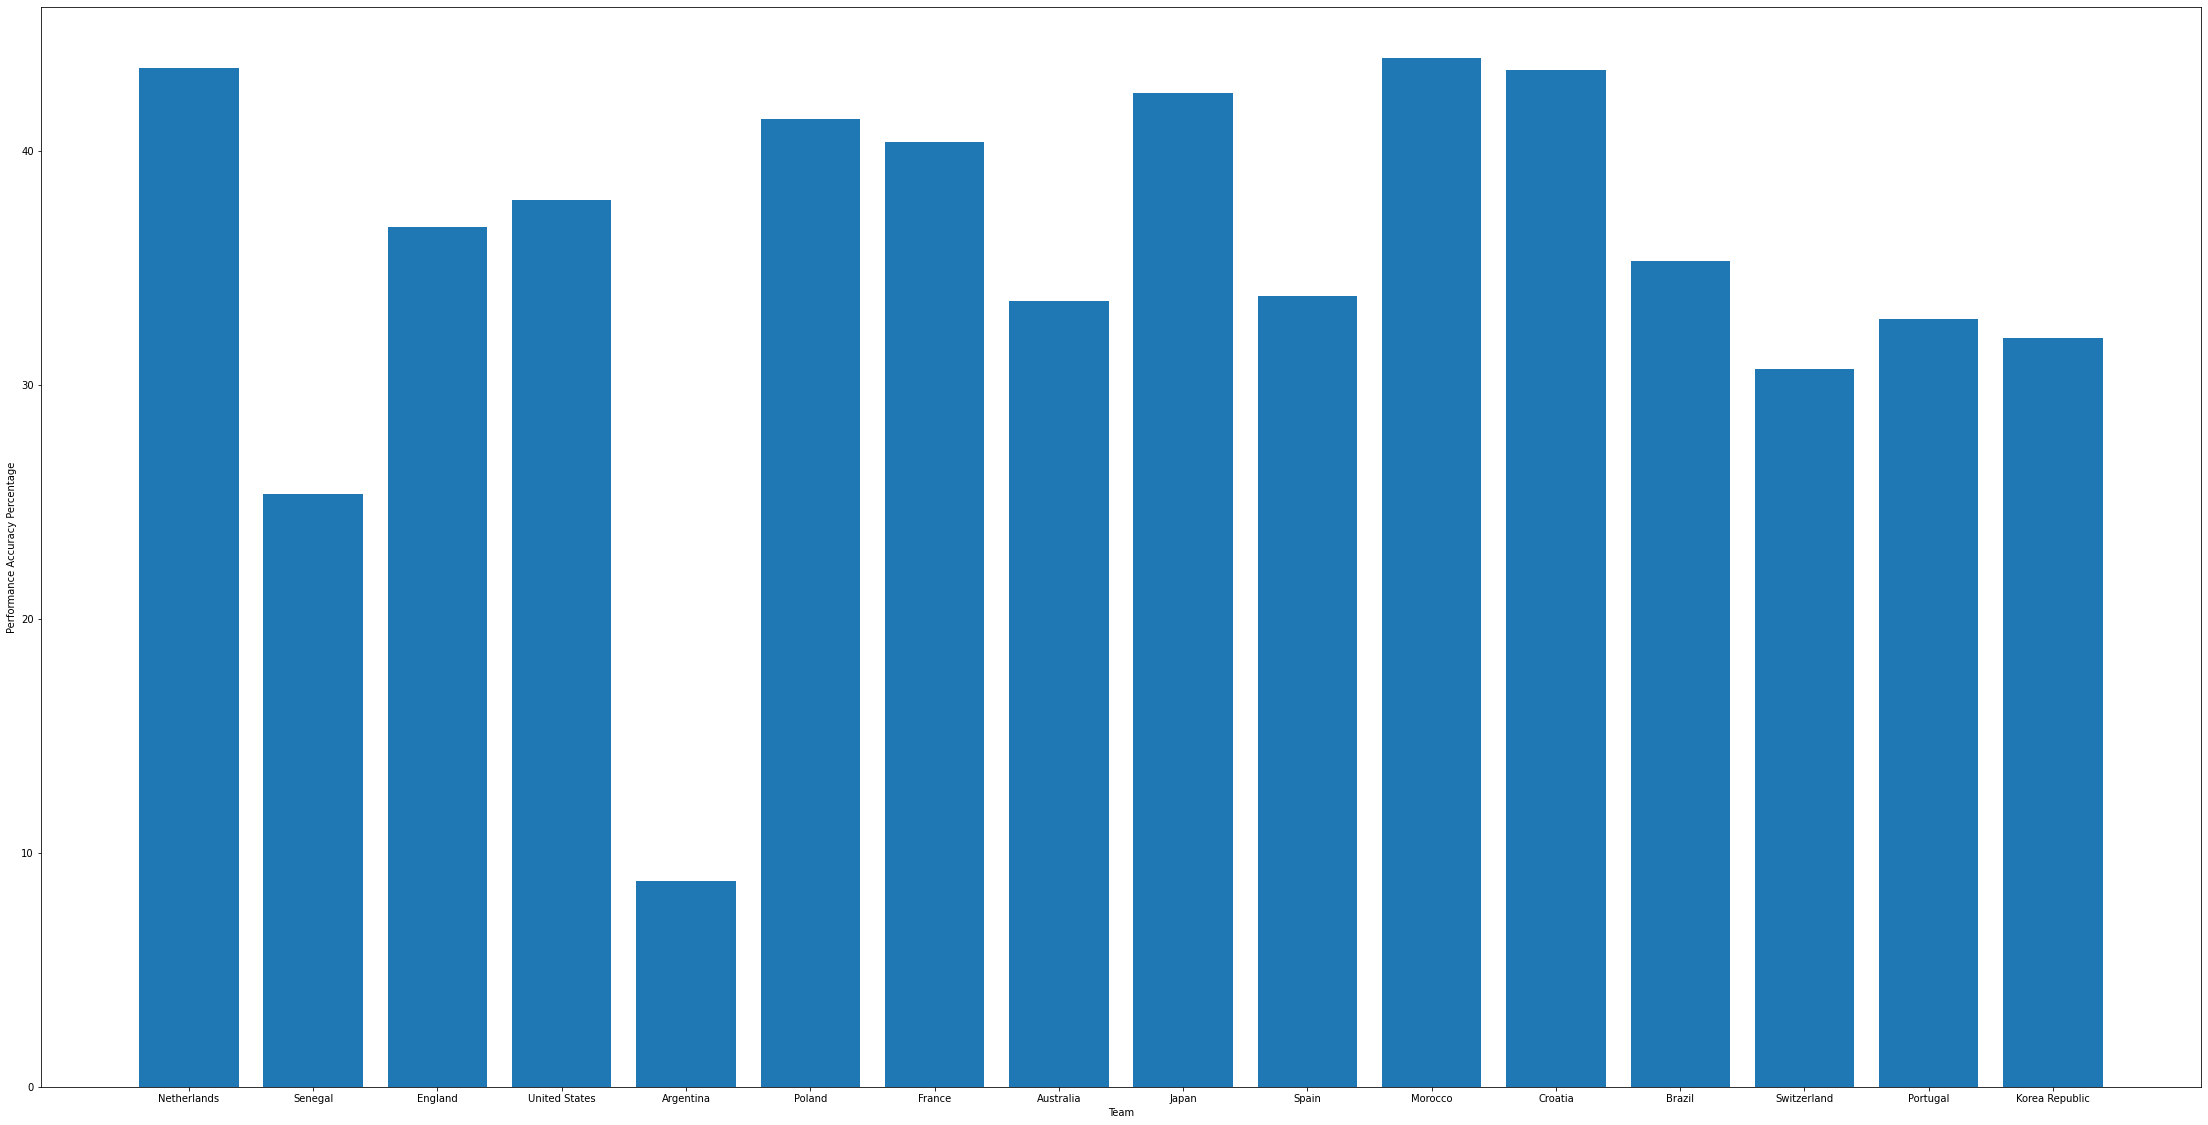

In [21]:
x = np.array(merged_data['team'])
y = np.array(merged_data['performance_accuracy_pct'])
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y)
plt.xlabel("Team")
plt.ylabel("Performance Accuracy Percentage")

In [22]:
#According to this Morocco, has the highest performance accuracy percentage, at 43.95, Netherlands at 43.52, Croatia at 43.45
#Now that I am doing this project on the 12th of December and we are about to be at the semi finals of the world cup, I am going to color coordinate the graph to show teams eliminated from the round of 16 and the quarter finals

Text(0, 0.5, 'Performance Accuracy Percentage')

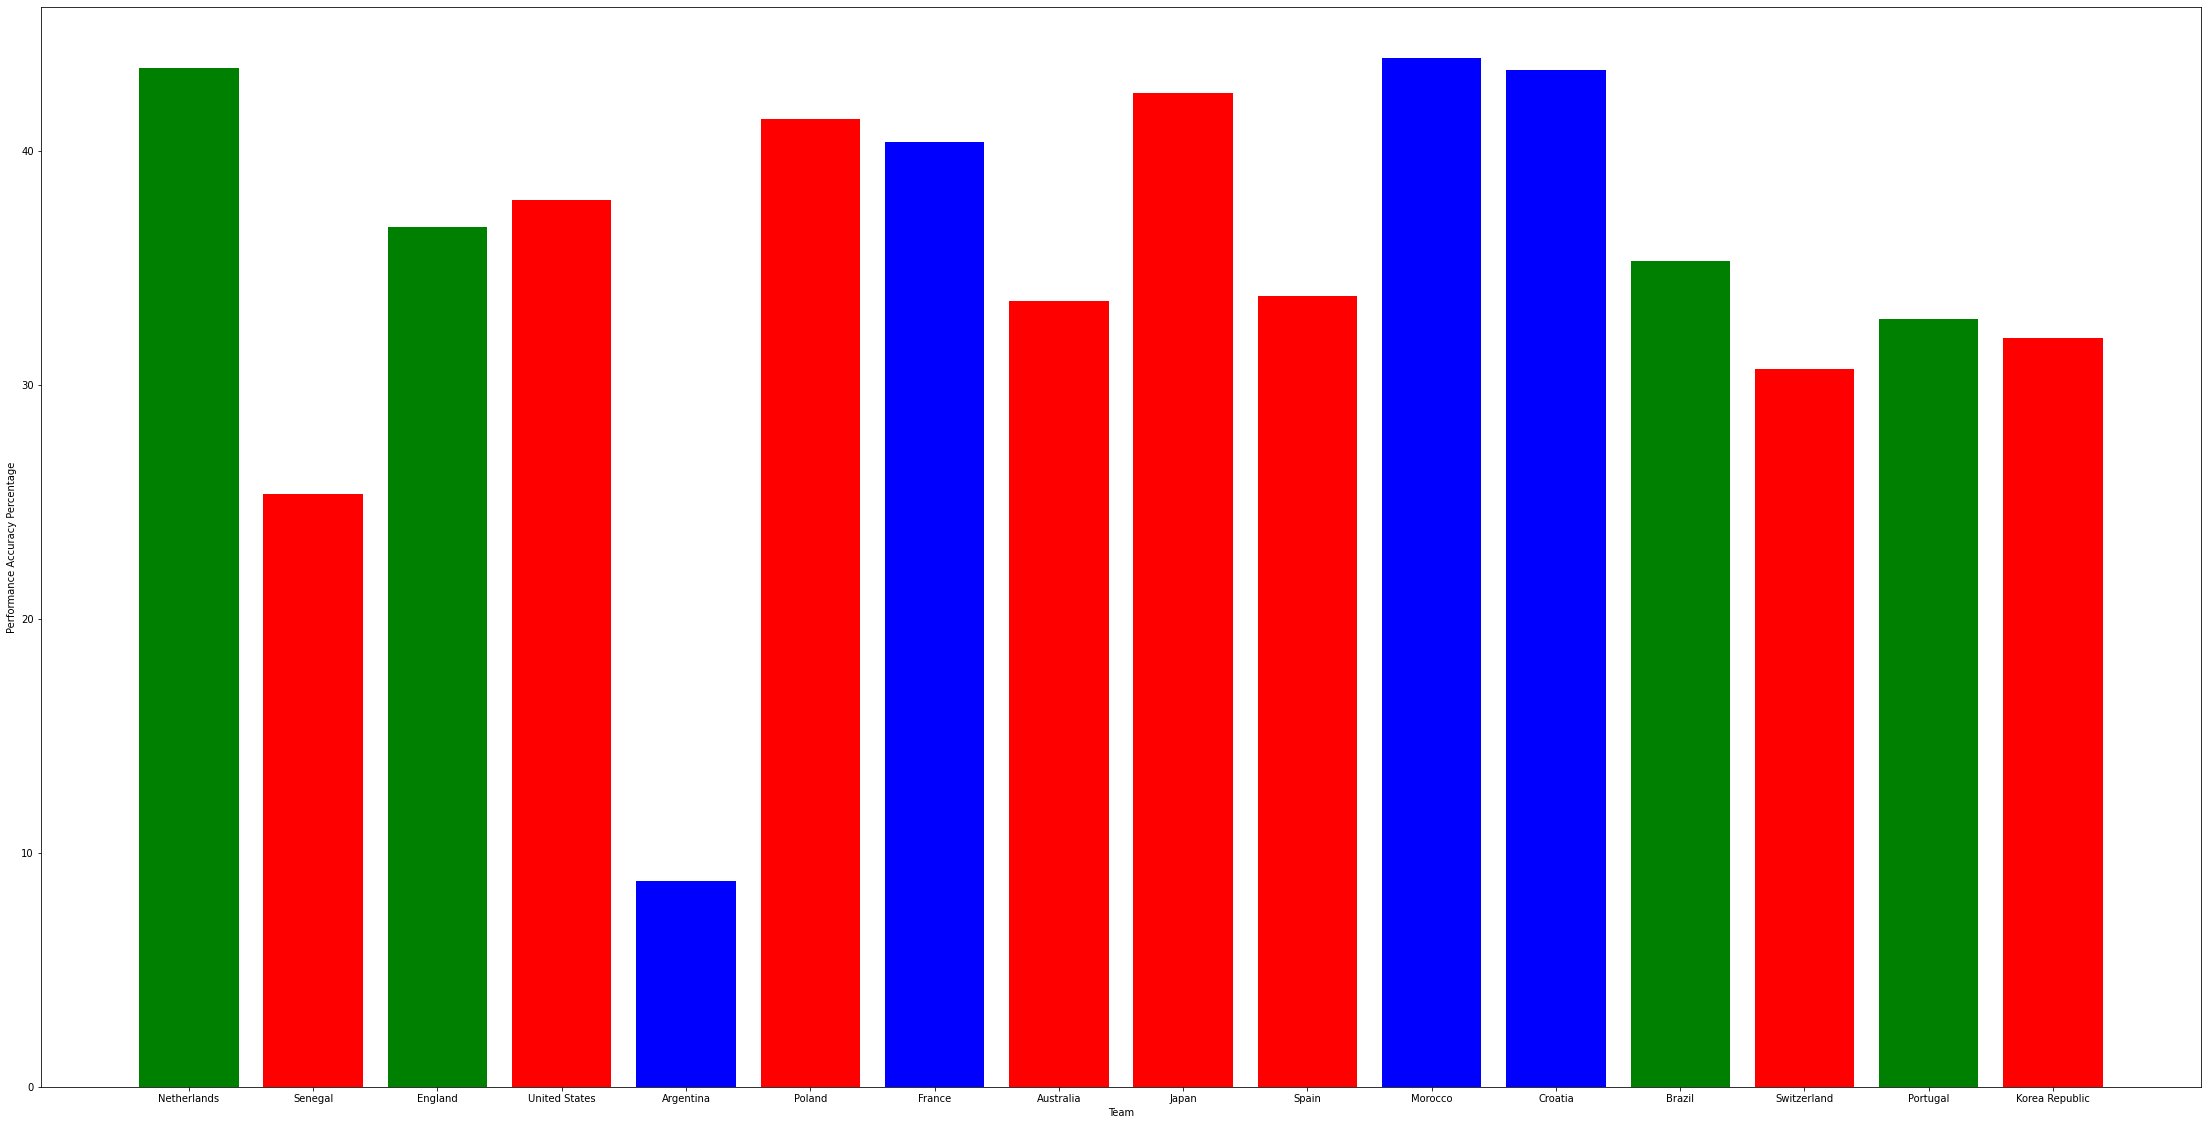

In [23]:
x = np.array(merged_data['team'])
y = np.array(merged_data['performance_accuracy_pct'])
colors = ['g', 'r', 'g', 'r', 'b', 'r', 'b', 'r', 'r', 'r', 'b', 'b', 'g', 'r', 'g', 'r']
fig = plt.figure(figsize=(30,15))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, y, color=colors)
plt.xlabel("Team")
plt.ylabel("Performance Accuracy Percentage")

## Part 4: Deeper Analysis Classification